<a href="https://colab.research.google.com/github/pedrofranke/ProyectoFinal-Henry/blob/main/EDA_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análisis exploratorio de datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Se realiza un análisis exploratorio de los datos, con la finalidad de encontrar patrones que permitan generar información para la toma de decisiones en relación a los restaurantes existentes en los estados de **California**, **Texas**, **Florida**, **New York** & **Pennsylvania**.<br>
Para una lectura mas ordenada, los códigos de gráficos y otros datos se colocaron en funciones dentro de la librería `functions` que se adjunta en este repositorio.

Importamos las librerías necesarias para el an'alisis

In [2]:
import pandas as pd
import numpy as np
%load_ext autoreload
%autoreload 2
import functions
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns


## Abrimos el archivo que contiene los datos de Google Maps y Yelp.

In [ ]:
df_final = pd.read_parquet('/content/drive/MyDrive/PF-Henry/Henry - Proyecto Final/Datos PF Henry/Unified/Final/df_unified.parquet')


## Verificamos que no se registren valores nulos en los datos

In [ ]:
functions.contar_nulos(df_final)

,cantidad_nulos
user_id,0
business_id,0
rating,0
year,0
month,0
sentiment_analysis,0
business_name,0
category,0
avg_rating,0
review_count,0


In [ ]:
# Eliminamos la columna review_id, ya que no es necesaria para el análisis

df_final.drop(columns='review_id', inplace=True)

df_final.head(3)

,user_id,business_id,rating,year,month,sentiment_analysis,business_name,category,avg_rating,review_count,address,state,city,postal_code,latitude,longitude,cluster,county,%_competition
0,3-1va0IQfK-9tUMzfHWfTA,MTSW4McQd7CbVtyjqoe9mw,5.0,2018.0,5.0,5.0,St Honore Pastries,Cafe,4.0,80.0,935 Race St,California,Philadelphia,19107,39.955505,-75.155564,33.0,Philadelphia County,3.96668
1,KQSRUu4Aapl0hG6eu2v8iw,MTSW4McQd7CbVtyjqoe9mw,4.0,2018.0,3.0,5.0,St Honore Pastries,Cafe,4.0,80.0,935 Race St,California,Philadelphia,19107,39.955505,-75.155564,33.0,Philadelphia County,3.96668
2,qUfRCH5NUyRDsJfM6jA5PQ,MTSW4McQd7CbVtyjqoe9mw,4.0,2017.0,4.0,5.0,St Honore Pastries,Cafe,4.0,80.0,935 Race St,California,Philadelphia,19107,39.955505,-75.155564,33.0,Philadelphia County,3.96668


### Verificamos el tipo de dato de cada columna

In [ ]:
functions.verificar_tipo_variable(df_final)

,nombre_campo,tipo_datos
0,user_id,[<class 'str'>]
1,business_id,[<class 'str'>]
2,rating,[<class 'float'>]
3,year,[<class 'float'>]
4,month,[<class 'float'>]
5,sentiment_analysis,[<class 'float'>]
6,business_name,[<class 'str'>]
7,category,[<class 'str'>]
8,avg_rating,[<class 'float'>]
9,review_count,[<class 'float'>]


### Debido a que algunas columnas contienen datos en tipo *float*, se van a modificar a tipo *int* ya que es necesario realizar ese cambio.

In [ ]:
df_final['year'] = pd.to_numeric(df_final['year'], downcast='integer')
df_final['month'] = pd.to_numeric(df_final['month'], downcast='integer')
df_final['sentiment_analysis'] = pd.to_numeric(df_final['sentiment_analysis'], downcast='integer')

Chequeamos que se hayan realizado los cambios correctamente

In [ ]:
functions.verificar_tipo_variable(df_final)

,nombre_campo,tipo_datos
0,user_id,[<class 'str'>]
1,business_id,[<class 'str'>]
2,rating,[<class 'float'>]
3,year,[<class 'int'>]
4,month,[<class 'int'>]
5,sentiment_analysis,[<class 'int'>]
6,business_name,[<class 'str'>]
7,category,[<class 'str'>]
8,avg_rating,[<class 'float'>]
9,review_count,[<class 'float'>]


##Filtrando ciudades por latitud y longitud

Encontramos varios errores en valores de latitud y longitud, por lo cual procedemos a corregirlos.

In [39]:
# Filtrar y corregir datos incorrectos
df_corregido = df_final.copy()  # Crear una copia del DataFrame original para realizar los cambios

# Filtrar filas que no cumplen con las condiciones para cada estado
df_corregido['Florida'] = (
    (df_corregido['latitude'] >= 24.396308) & (df_corregido['latitude'] <= 31.000968) &
    (df_corregido['longitude'] >= -87.634643) & (df_corregido['longitude'] <= -80.031362)
)

df_corregido['California'] = (
    (df_corregido['latitude'] >= 32.534156) & (df_corregido['latitude'] <= 42.009518) &
    (df_corregido['longitude'] >= -124.409591) & (df_corregido['longitude'] <= -114.131211)
)

df_corregido['Pennsylvania'] = (
    (df_corregido['latitude'] >= 39.719800) & (df_corregido['latitude'] <= 42.269179) &
    (df_corregido['longitude'] >= -80.519891) & (df_corregido['longitude'] <= -74.689516)
)

df_corregido['NewYork'] = (
    (df_corregido['latitude'] >= 40.477399) & (df_corregido['latitude'] <= 45.015850) &
    (df_corregido['longitude'] >= -79.762152) & (df_corregido['longitude'] <= -71.856214)
)

df_corregido['Texas'] = (
    (df_corregido['latitude'] >= 25.837377) & (df_corregido['latitude'] <= 36.500704) &
    (df_corregido['longitude'] >= -106.645646) & (df_corregido['longitude'] <= -93.508292)
)

# Marcar filas con datos incorrectos
df_corregido['Datos_correctos'] = (
    df_corregido['Florida'] | df_corregido['California'] | df_corregido['Pennsylvania'] |
    df_corregido['NewYork'] | df_corregido['Texas']
)

# Eliminar filas con datos incorrectos
df_corregido = df_corregido[df_corregido['Datos_correctos']]

# Eliminar columnas temporales
df_corregido.drop(['Florida', 'California', 'Pennsylvania', 'NewYork', 'Texas', 'Datos_correctos'], axis=1, inplace=True)

# Ahora df_corregido contiene solo las filas con datos correctos según las condiciones de latitud y longitud para cada estado


In [43]:
df_final = df_corregido.copy()

In [45]:
#Guardamos los datos de registros con las latitudes y longitudes corregidas

df_final.to_parquet('datos_finales_corregidos.parquet')

## Análisis temporal de reviews

Reviews por año

Cantidad de reseñas promedio por día: 1186


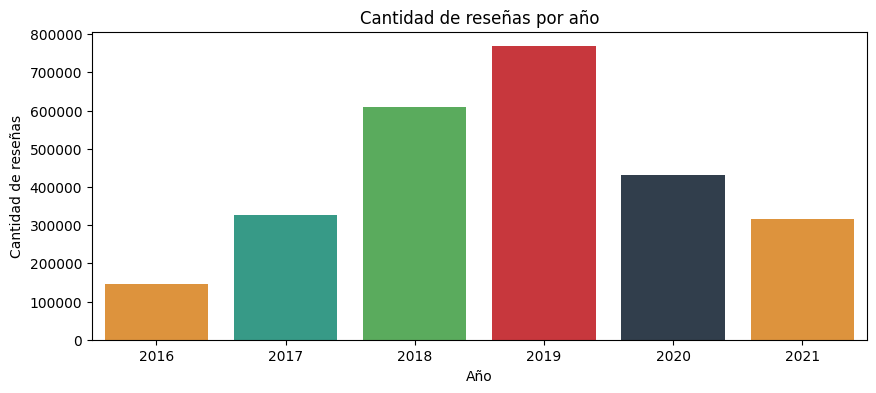

In [46]:
functions.reviews_por_año(df_final)

Reviews por mes por año

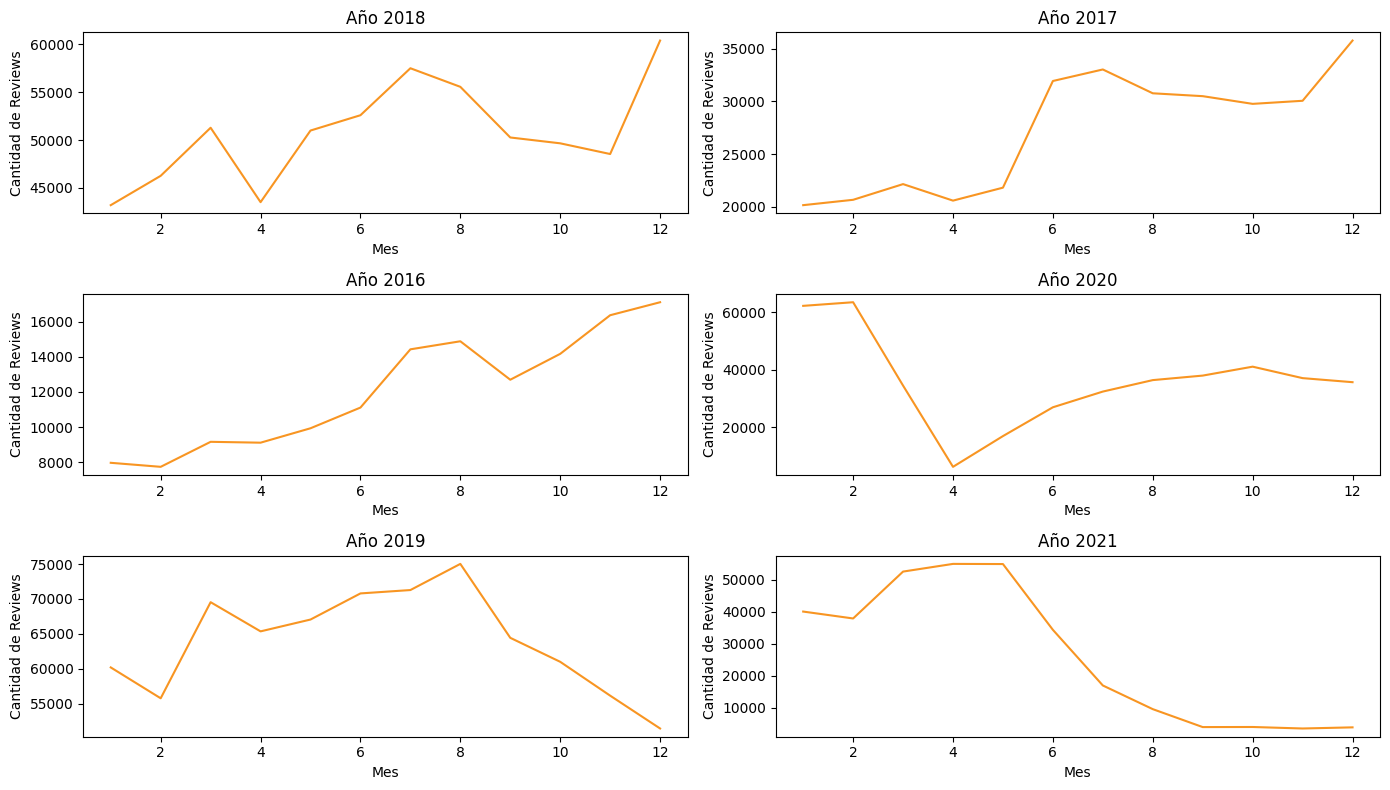

In [47]:
functions.reviews_mensuales(df_final)

En este gráfico no encontramos patrones a nivel general, pero si podemos observar la disminución de reseñas a partir del año 2019 y durante todo el 2020, esto debido a las restricciones de la pandemia de COVID-19.

Reviews por mes

El mes con menor cantidad de reviews tiene 191643 reviews
El mes con mayor cantidad de reviews tiene 239204 reviews


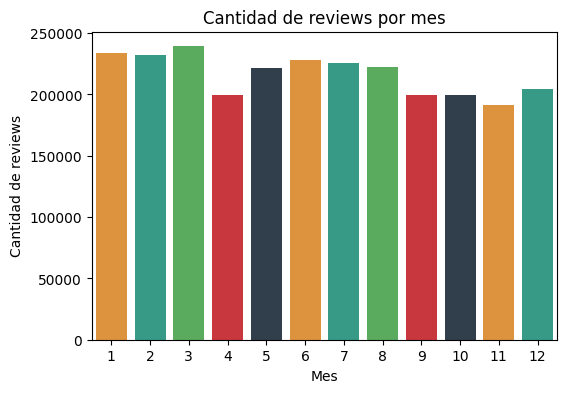

In [48]:
functions.cantidad_de_reviews_por_mes(df_final)

## Análisis de competitividad

Rating promedio de restaurantes por estado

In [55]:
functions.promedio_rating_reviews(df_final)

,state,avg_rating
0,California,4.237388
1,Florida,4.111685
2,New York,4.257415
3,Pennsylvania,4.095024
4,Texas,4.189384


Competitividad por estado

In [54]:
functions.competitividad_por_estado(df_final)

,state,%_competence
0,California,6.821548
1,Florida,6.065293
2,New York,7.268402
3,Pennsylvania,6.271995
4,Texas,8.021482


En este apartado, podemos visualizar que el estado con menos competitividad es el estado de Florida, con un 6.06%.<br>
El más competitivo resulta ser Texas, con un 8.02%.

## Análisis cuantitativo

Cantidad porcentual de restaurantes por estado en 2021

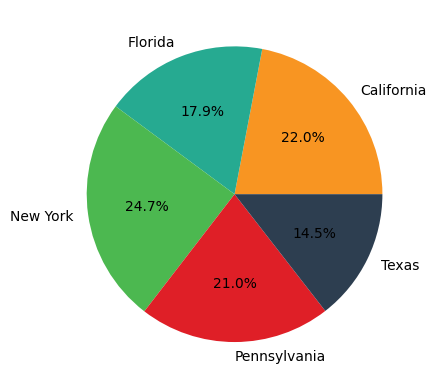

In [49]:
functions.restaurants_por_estado(df_final)

En el gráfico podemos observar que en general hay una distribución pareja de la cantidad de restaurantes entre los 5 estados. Pero New York es el estado que conserva la mayor cantidad de restaurantes con un 24.7% del total y Texas tiene solamente un 14.5%.

Cantidad de restaurantes por año por estado

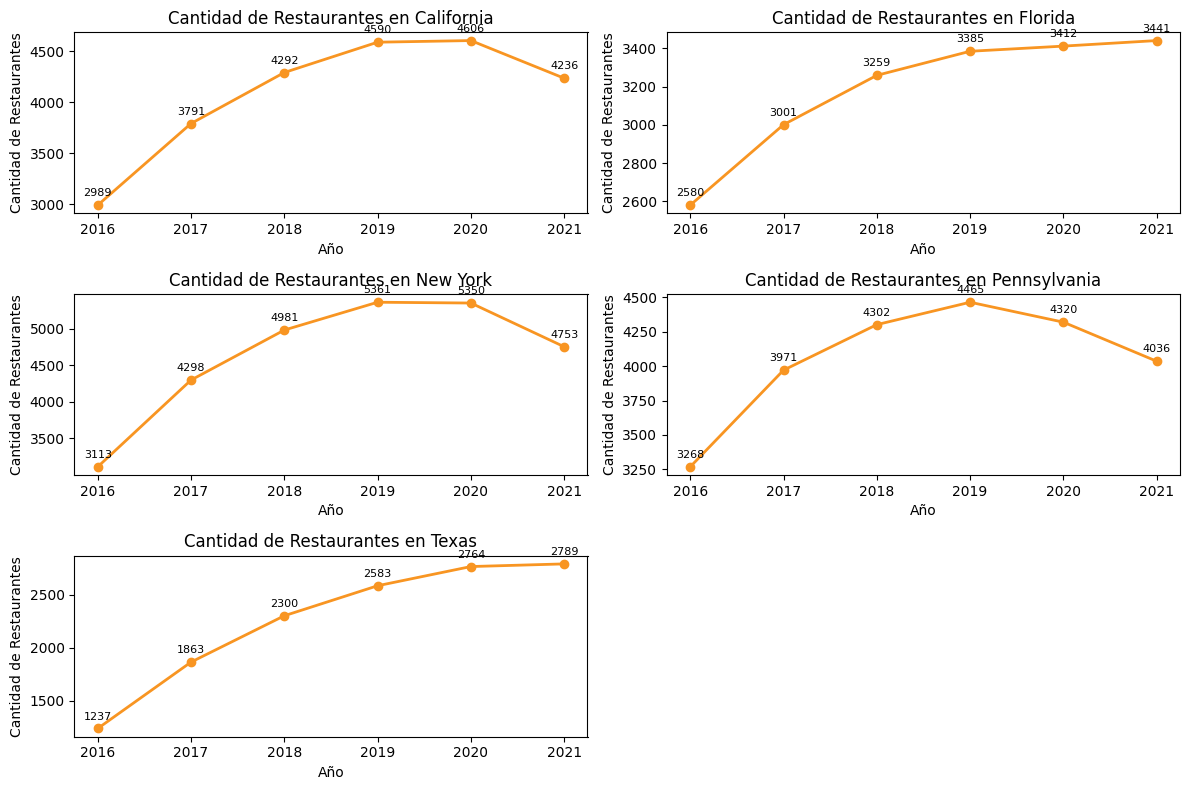

In [50]:
functions.cant_restaurantes(df_final)

En los gráficos podemos ver que, en general, en todos los estados hubo una evoluación de la cantidad de restaurantes a través de los años, hasta el año 2020 donde en algunos estados, se registra una baja en las cantidades, esto debido a las restricciones por la pandemia de COVID-19.

Restaurantes por ciudad por estado

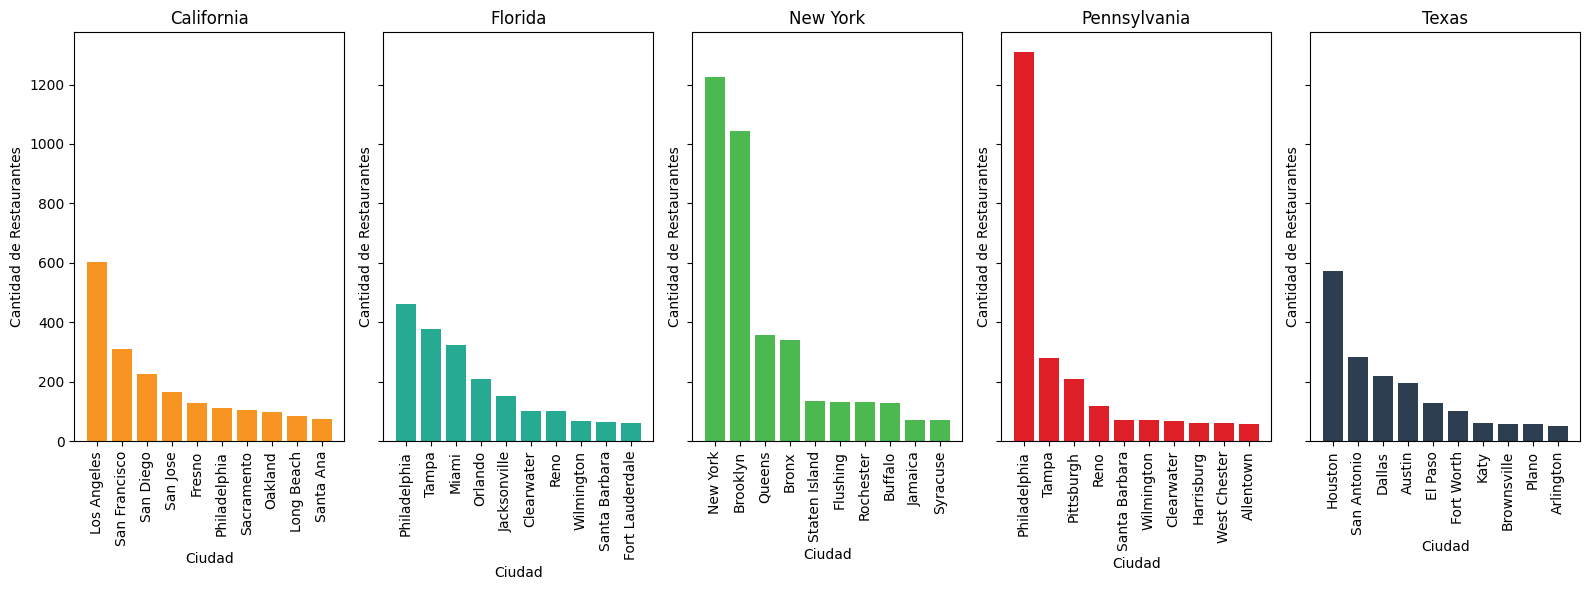

In [51]:
functions.restaurantes_por_ciudad(df_final)

Categorías por estado

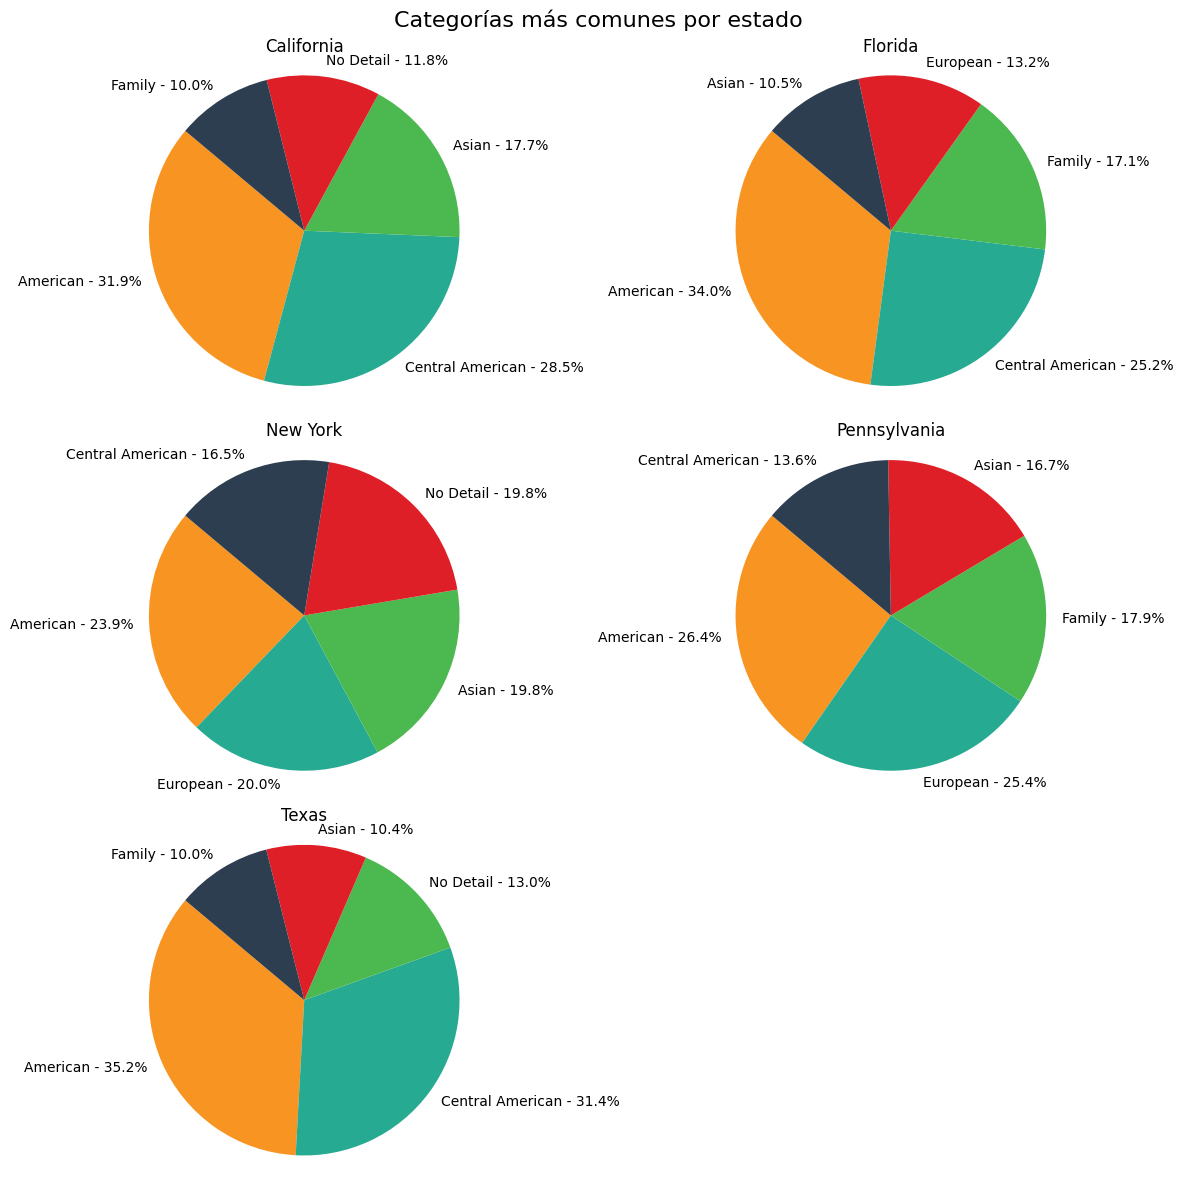

In [52]:
functions.cantidad_categorias(df_final)